# Stochastic Gradient Descent

The least squares objective function is 
$$ f(x) = \sum_{j=1}^m r_j^2(x)$$
Or in the linear case, it's represented as:
$$ f(x) = \|Ax - b\|_2^2$$

The **normalized least squares function** is

$$ f(x) = \frac{1}{m}\|Ax - b\|_2^2$$

where your data points are $(t_1,y_1),\dots, (t_m,y_m)$ in the 2-D case. When we use Stochastic/Batch gradient Descent, we use the normalized least squares function to establish a model which fits the data.

So in the 2-D case,

$A = \begin{bmatrix}
1 & t_1 \\
1 & t_2 \\
\vdots \\
1 & t_m
\end{bmatrix}$, $b = \begin{bmatrix}
y_1 \\
y_2 \\
\vdots \\
y_m
\end{bmatrix}$


**What is the problem with Gradient Descent?**

Gradient computation takes a long time because all the data points are used to calculate the gradient.

$$ \nabla f(x) = A^T (A x - b)$$

At each step of the algorithm:

1. Compute the gradient $\nabla f(x)$
2. $x_{k+1} = x_k - \alpha \nabla f(x)$



This can be problematic if $A$ is a very large matrix, which can easily happen if you have a large number of data points.

**How does Stochastic Gradient Descent (SGD) solve this problem?**

In each step of Stochastic Gradient Descent, it samples a small portion of the data (minibatch) of size $k$. The gradient is approximated using each minibatch, $x_k$ is updated, and this is repeated until $m/k$ samples have been created.

Use a "minibatch" of the data to approximate the gradient at each step.

A minibatch is a subset of the data: If you have a minibatch of size 1, you sample 1 point from the data, $t_j$:

$A_{mb} = \begin{bmatrix}
1 & t_j
\end{bmatrix}$, $b_{mb} = \begin{bmatrix}
y_j
\end{bmatrix}$
Then you compute the updated gradient as
$$\nabla f(x) = 2 A_{mb}^T (A_{mb} x - b_{mb})$$

Since the minibatch is of size 1 and we have $m$ points, you repeat this $m$ times per step:

At each step of the algorithm:

for $i = 1:m$:
1. Sample a point $(t_j, y_j)$ randomly
2. Compute the gradient $\nabla f(x) = \begin{bmatrix} 1 \\ t_j \end{bmatrix} \left(\begin{bmatrix} 1 & t_j \end{bmatrix} x - \begin{bmatrix} y_1 \end{bmatrix}\right)$
3. Update $x_{k+1} = x_k - \alpha \nabla f(x)$

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
m = 100
X=2*np.random.rand(m,1)
y=4+3*X+np.random.randn(m,1)
X_b = np.c_[np.ones((m, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best


array([[3.82069476],
       [3.18472584]])

In [2]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
# add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.82069476],
       [10.19014643]])

Computing SGD:

Here is the code for SGD with fixed step size:

We have $m=100$ data points, so:

For 50 epochs:

Repeat the following 100 times:

1. Select a random point $(t_j, y_j)$.

2. Let $A = [1, t_j]$, $b = [y_j]$, and compute the gradient $\nabla f$ using these values for $A$ and $b$.

3. Update $x_k$.


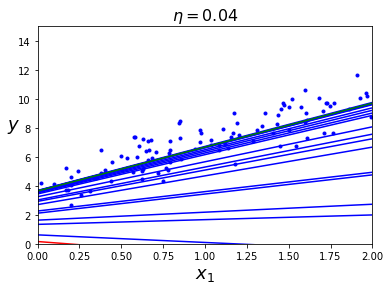

In [3]:
n_epochs = 50
eta = 0.04
theta = np.random.randn(2,1) # random initialization
theta_path_sgd_nols = []
for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20: # this just illustrates the different slopes of a single epoch
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r-"
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m) # get a random data point
        xi = X_b[random_index:random_index+1]   # A is now restricted to this single row
        yi = y[random_index:random_index+1]  # b is restricted to this single row
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) # perform steepest descent
        theta = theta - eta * gradients
        theta_path_sgd_nols.append(theta) 
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16) 
plt.plot(X, y, "b.")
plt.plot(X_new, y_predict, "g-")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show() 

Gradient Step

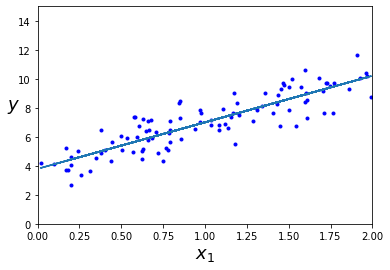

In [5]:
def gradient_descent(X_b, y, X, n_iterations, eta=0.0004):
    # n_iterations: total epochs
    # eta: fixed learning rate (step size)
    # X: for plotting purposes
    theta_path_bgd = []
    theta = np.random.randn(2,1) #random start
    for iteration in range(n_iterations):
        gradients = X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        theta_path_bgd.append(theta)
    plt.plot(X, y, "b.")
    plt.plot(X, theta[0] + theta[1]*X)
    plt.xlabel("$x_1$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.show() 
    return theta_path_bgd
theta_path_bgd = gradient_descent(X_b, y, X, 500)

### Variable Learning Schedule

**Learning rate**: In gradient descent, we refer to the step size as the learning rate $\eta$ (eta).

**Problem**: Stochastic Gradient Descent can fail to settle down even when near the minimum.

**Solution**: Variable learning schedule to keep the learning rate high at the start of SGD, decreasing it as time goes on.

**Example learning schedule**:
$$ \eta = \frac{200}{\text{epoch}*m + i + 500}$$

At the start of SGD, the learning rate will be $\frac{200}{500}$.

After the first epoch, it will be $\frac{200}{600}$ since $m=100$.

After 50 epochs, it will be $\frac{200}{5100}=0.04$.

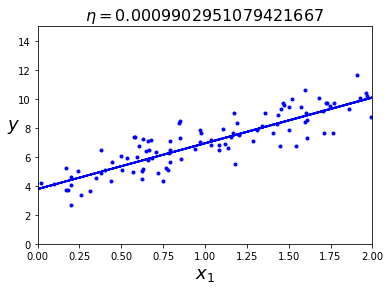

Wall time: 191 ms


In [6]:
%%time
def stochastic_gradient_descent_learning_schedule(X_b, y, X, n_iterations, t0=5, t1=50):
    def learning_schedule(t): # decreasing learning rate
        return t0 / (t + t1) # schedule function
    theta = np.random.randn(2,1) # random initialization
    theta_path_sgd = []
    for epoch in range(n_epochs):
        for i in range(m):
            if epoch == 40 and i < 20:
                y_predict = X_new_b.dot(theta)
                style = "b-" if i > 0 else "r-"
                plt.plot(X_new, y_predict, style)
            random_index = np.random.randint(m) # get a random data point
            xi = X_b[random_index:random_index+1]   # A is now restricted to this single row
            yi = y[random_index:random_index+1]  # b is restricted to this single row
            gradients = 2 * xi.T.dot(xi.dot(theta) - yi) # perform steepest descent
            eta = learning_schedule(epoch * m + i) # eta is the step size (learning rate)
            theta = theta - eta * gradients
            theta_path_sgd.append(theta) 
        plt.xlabel("$x_1$", fontsize=18)
        plt.axis([0, 2, 0, 15])
        plt.title(r"$\eta = {}$".format(eta), fontsize=16) 
    plt.plot(X, y, "b.")
    plt.xlabel("$x_1$", fontsize=18)
    plt.ylabel("$y$", rotation=0, fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.show() 
    return theta_path_sgd
theta_path_sgd=stochastic_gradient_descent_learning_schedule(X_b, y, X, 50)

### Minibatch Stochastic Gradient Descent


Stochastic Gradient Descent is basically Minibatch Gradient Descent with a minibatch size of 1.

With Minibatch Gradient Descent, we partition the dataset into equally sized minibatches. During each epoch, we calculate the gradient of the minibatch and use it to update $x_k$.

For example: Say we're performing Minibatch Gradient Descent with minibatch size of 5. Our first minibatch contains the indices $\{1, 3, 5 ,6, 9\}$. Then

$$A_{mb} = \begin{bmatrix}
1 & t_1\\
1 & t_3\\
1 & t_5\\
1 & t_6\\
1 & t_9\\
\end{bmatrix}$$
$$b_{mb} = \begin{bmatrix}
y_1\\
y_3\\
y_5\\
y_6\\
y_9\\
\end{bmatrix}$$


Then you compute the updated gradient as
$$\nabla f(x) = \frac{2}{5} A_{mb}^T (A_{mb} x - b_{mb})$$

At each step of the algorithm, if we have minibatch size $k$ and data length $m$, we'll have $m/k$ minibatches.

### One step of Minibatch:

**Partition** the data into $m/k$ minibatches of size $k$.

for each of the $m/k$ minibatches:
1. Calculate $A_{mb}$, $b_{mb}$ based on the minibatch.
2. Compute the gradient $\nabla f(x) = \frac{2}{\frac{m}{k}}  A_{mb}^T (A_{mb} x - b_{mb})$
3. Update $x_{k+1} = x_k - \alpha \nabla f(x)$


### Note: (random sampling vs partitioning)

In Stochastic Gradient Descent, we randomly sample a single data point in every epoch. In Minibatch Gradient Descent, we can either randomly sample the minibatches or partition the dataset into different minibatches; either is fine.



### Code

#### Shuffling Indices:

 With minibatch stochastic gradient descent, we can randomize the indices in each epoch:

In [ ]:
shuffled_indices = np.random.permutation(m)
X_b_shuffled = X_b[shuffled_indices]

In [ ]:
shuffled_indices

In [ ]:
%%time
def minibatch_gradient_descent(X_b, y, n_iterations, minibatch_size, t0=200, t1=500):
    theta_path_mgd = []
    n_iterations = 50
    minibatch_size = 20
    np.random.seed(42)
    m = len(X_b)
    theta = np.random.randn(2,1) # random initialization
    def learning_schedule(t): # Learning rate
        return t0 / (t + t1)
    t = 0
    for epoch in range(n_iterations):
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X_b[shuffled_indices]
        # shuffle/randomize indices towards iid samples
        # to improve settling down towards convergence
        y_shuffled = y[shuffled_indices]
        for i in range(0, m, minibatch_size):
            t += 1
            xi = X_b_shuffled[i:i+minibatch_size]
            yi = y_shuffled[i:i+minibatch_size]
            gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
            eta = learning_schedule(t)
            theta = theta - eta * gradients
            theta_path_mgd.append(theta)
    return theta_path_mgd
theta_path_mgd = minibatch_gradient_descent(X_b, y, 50, 20)

## Plotting

In [ ]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_sgd_nols = np.array(theta_path_sgd_nols) # No learning rate scheduler
theta_path_mgd = np.array(theta_path_mgd)

In [ ]:
# Comparing the convergence rates

theta_diff_bgd = theta_path_bgd - theta_best
theta_diff_sgd = theta_path_sgd - theta_best
theta_diff_sgd_nols = theta_path_sgd_nols - theta_best
theta_diff_mgd = theta_path_mgd - theta_best

#plt.plot(np.linalg.norm(theta_diff_bgd, axis=1))
plt.plot(np.linalg.norm(theta_diff_mgd, axis=1))

In [ ]:
plt.plot(np.linalg.norm(theta_diff_sgd, axis=1), 'g')
plt.plot(np.linalg.norm(theta_diff_sgd_nols, axis=1), 'r')
plt.title("Comparing SGD with learning rate scheduler (green) vs no learning rate scheduler (red)" )

In [ ]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1,
label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+",
linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o",
linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$ ", fontsize=20, rotation=0)
plt.axis([2, 5, 1, 3.9])
plt.show()

## In Summary

## Batch Gradient Descent

At each step, compute the gradient using the entire dataset.
$$\nabla f(x) = 2 A^T (A x - b)$$
$$x_{k+1} = x_k - \eta \nabla f(x_k)$$

### Problems:

* Memory consumption is too high - it's too computationally expensive to compute the gradient of an absurdly large matrix.

## Stochastic Gradient Descent

At each step, randomly select a point and calculate the gradient using that point.

$A_{mb} = \begin{bmatrix}
1 & t_j
\end{bmatrix}$, $b_{mb} = \begin{bmatrix}
y_j
\end{bmatrix}$
Then you compute the updated gradient as
$$\nabla f(x) = 2 A_{mb}^T (A_{mb} x - b_{mb})$$

### Benefits:
* Much less memory consumption than Batch Gradient Descent

### Problems:

* Naturally high level of oscillation; will continue to oscillate heavily even when close to the minimizer

## Batch Gradient Descent

At each step, randomly select a minibatch of the data and calculate the gradient using the data points within that minibatch.

$$A_{mb} = \begin{bmatrix}
1 & t_1\\
1 & t_3\\
1 & t_5\\
1 & t_6\\
1 & t_9\\
\end{bmatrix}$$
$$b_{mb} = \begin{bmatrix}
y_1\\
y_3\\
y_5\\
y_6\\
y_9\\
\end{bmatrix}$$
$$\nabla f(x) = 2 A_{mb}^T (A_{mb} x - b_{mb})$$
### Benefits:
* Stabilizes the Stochastic Gradient Descent path to reduce oscillation

### Variable Learning Schedule

Establishing a variable learning schedule can help stochastic gradient method / minibatch gradient method settle down once it approaches a minimum.

Something like
$$ \eta = \frac{200}{t + 500}$$
where $t$ is number of iterations